# Entender o Problema

- Objetivo do Problema:
    - Predição de qual país será o primeiro destino de reserva de um novo usuário;
    - Porque?
        - Qual o tipo de modelo de negócio do Airbnb?
            - Marketplace (conecta pessoas que oferecem acomodação, com pessoas que estão procurando acomodação)
            - Oferta (pessoas oferecendo acomodação)
                - Tamanho do portifólio
                - Diversisdade/Densidade de Portfólio
                - preço Médio
            - Demanda (pessoas procurando acomodação)
                - Número de Usuários
                - LTV (Lifetime Value)
                - CAC ( Client Acquisition Cost)

        Gross Revenue = (Fee*Numero cliente) - CAC

- Proposta de Solução:
    - Modelo de Previsão do primeiro destino de um novo usuário
    - 1.0. Predições salvas em uma tabela do banco de dados
    - 2.0. API
        - Input: usuário e suas características
        - Output: usuário e suas características com a predição de destino

# <font color='red'>Ciclo 01: End to End</font>

# 0.0. Imports

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
from sklearn import metrics as m
from scikitplot import metrics as mt

from keras import models as ml
from keras.layers import Dense, Dropout

## 0.1. Helper Functions

## 0.2. Loading Data

In [2]:
df_users_raw = pd.read_csv('../data/train_users_2.csv', low_memory=True)

df_sessions_raw = pd.read_csv('../data/sessions.csv', low_memory=True)

df_users_raw.shape

(213451, 16)

# 1.0 Data Description

In [4]:
df1 = df_users_raw.copy()

## 1.1. Data Dimension

In [5]:
print('Number of rows {}'.format(df1.shape[0]))
print('Number of columns {}'.format(df1.shape[1]))

Number of rows 213451
Number of columns 16


## 1.2. Data Types

In [6]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [7]:
df1.head().T

,0,1,2,3,4
id,gxn3p5htnn,820tgsjxq7,4ft3gnwmtx,bjjt8pjhuk,87mebub9p4
date_account_created,2010-06-28,2011-05-25,2010-09-28,2011-12-05,2010-09-14
timestamp_first_active,20090319043255,20090523174809,20090609231247,20091031060129,20091208061105
date_first_booking,NaN,NaN,2010-08-02,2012-09-08,2010-02-18
gender,-unknown-,MALE,FEMALE,FEMALE,-unknown-
age,NaN,38.0,56.0,42.0,41.0
signup_method,facebook,facebook,basic,facebook,basic
signup_flow,0,0,3,0,0
language,en,en,en,en,en
affiliate_channel,direct,seo,direct,direct,direct


## 1.3. Check NAs

In [8]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [9]:
# remiove missing values
df1 = df1.dropna()
df1.shape

(68171, 16)

## 1.4. Change Types

In [10]:
# date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'], format='%Y-%m-%d')

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'], format='%Y-%m-%d')

# age
df1['age'] = df1['age'].astype(int)

In [11]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

## 1.5 Check Balanced Data

In [12]:
# response variable is the columns country_destination
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0. Feature Engineering

In [13]:
df2 = df1.copy()

# 3.0. Feature Filtering

## 3.1. Filtering Rows

## 3.2 Columns Selection

# 4.0. Exploratory Data Analysis

# 5.0. Data Preparation

In [14]:
df5 = df2.copy()

In [15]:
# dummy variable
df5_dummy = pd.get_dummies(df5.drop(['id', 'country_destination'], axis=1))

# join id and country destination
df5 = pd.concat([df5[['id', 'country_destination']], df5_dummy], axis=1)

# 6.0 Feature Selection

In [16]:
df6 = df5.copy()
cols_drop = ['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking'] #original dates

df6 = df6.drop(cols_drop, axis=1)

# 7.0. Machine Learn Model - Neural Network MLP

In [17]:
X = df6.drop('country_destination', axis=1)
y = df6[['country_destination']]

In [18]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [19]:
# Categorically encode labels
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1,1)).toarray()

In [20]:
# moel definition
model = ml.Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))

# model compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(X_train, y_train_nn, epochs=100)

2021-10-11 05:45:23.592537: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-11 05:45:23.655738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-11 05:45:23.656223: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.695GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-10-11 05:45:24.038114: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-11 05:45:24.960679: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-11 05:45:25.153835: I tensorflow/stream_executor/pla

Epoch 1/100


2021-10-11 05:45:36.830918: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


54536/54536 [==============================] - 7s 125us/step - loss: 1.2950 - accuracy: 0.7051
Epoch 2/100
54536/54536 [==============================] - 3s 60us/step - loss: 1.1593 - accuracy: 0.7088
Epoch 3/100
54536/54536 [==============================] - 3s 50us/step - loss: 1.1480 - accuracy: 0.7093
Epoch 4/100
54536/54536 [==============================] - 3s 61us/step - loss: 1.1442 - accuracy: 0.7096
Epoch 5/100
54536/54536 [==============================] - 3s 52us/step - loss: 1.1419 - accuracy: 0.7096
Epoch 6/100
54536/54536 [==============================] - 3s 55us/step - loss: 1.1410 - accuracy: 0.7095
Epoch 7/100
54536/54536 [==============================] - 3s 56us/step - loss: 1.1394 - accuracy: 0.7095
Epoch 8/100
54536/54536 [==============================] - 3s 54us/step - loss: 1.1389 - accuracy: 0.7096
Epoch 9/100
54536/54536 [==============================] - 3s 56us/step - loss: 1.1389 - accuracy: 0.7096
Epoch 10/100
54536/54536 [==============================]

## 8.0 Model Performance

In [51]:
# prediction
pred_nn = model.predict(X_test)

# invert prediction
yhat_nn = np.ravel(ohe.inverse_transform(pred_nn))

# prediction prepare
y_test_nn = np.ravel(y_test.to_numpy())

Accuracy: 0.6968096809680968


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

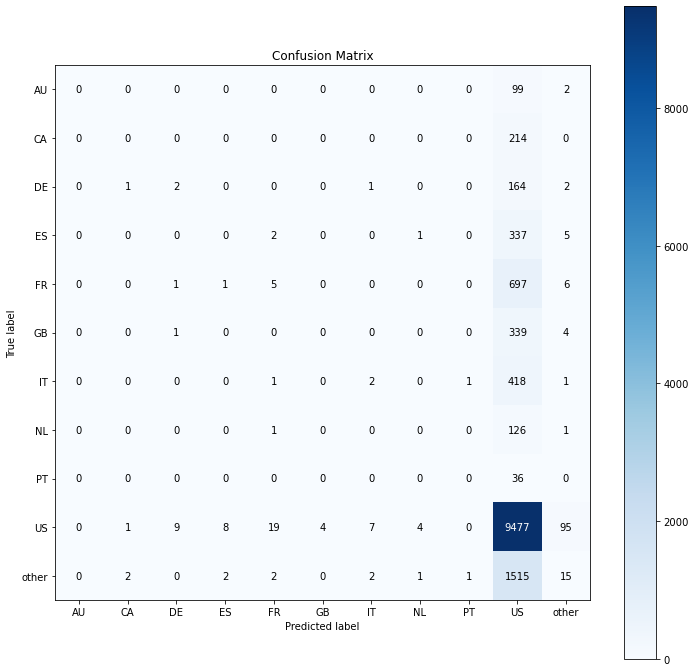

In [54]:
# Accuracy
acc_nn = m.accuracy_score(yhat_nn, y_test_nn)
print('Accuracy: {}'.format(acc_nn))
# Confusion Matrix
mt.plot_confusion_matrix(y_test_nn, yhat_nn, normalize=False, figsize=(12,12))

# Balanced Accuracy
# F-Score Balanced
# Recall-precision
# ROC
# Kappa Metrics
# Mathew Metrics